In [14]:
import numpy as np
from PIL import Image

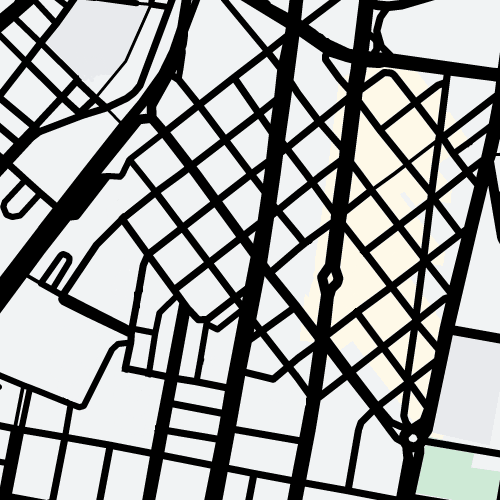

In [15]:
# Open an image file
img =  Image.open('mapz4fixed.png')
img

In [16]:
z4_grid = np.array(img)
z4_grid

array([[[241, 243, 244, 255],
        [241, 243, 244, 255],
        [241, 243, 244, 255],
        ...,
        [241, 243, 244, 255],
        [241, 243, 244, 255],
        [241, 243, 244, 255]],

       [[241, 243, 244, 255],
        [241, 243, 244, 255],
        [241, 243, 244, 255],
        ...,
        [241, 243, 244, 255],
        [241, 243, 244, 255],
        [241, 243, 244, 255]],

       [[241, 243, 244, 255],
        [241, 243, 244, 255],
        [241, 243, 244, 255],
        ...,
        [241, 243, 244, 255],
        [241, 243, 244, 255],
        [241, 243, 244, 255]],

       ...,

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0

In [17]:
# Assuming z4_grid is your numpy array
z4_grid[z4_grid != 0] = 255
z4_grid

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0

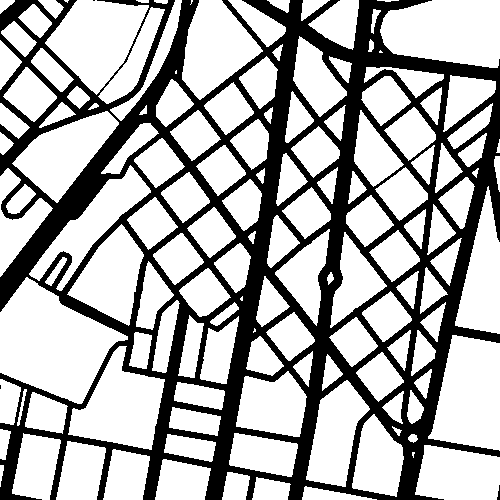

In [18]:
# Assuming img_matrix is your numpy array
PIL_image = Image.fromarray(np.uint8(z4_grid))

PIL_image

## Clave

0 <- calle

1 <- carro

2 <- obstáculo

[0,0] <- semáforo


In [1]:
# Street rules
import random
import numpy as np

def defineStreet(n, stMap):
    stMap[0][0] = 2
    stMap[0][len(stMap)-1] = 2
    stMap[len(stMap)-1][0] = 2
    stMap[len(stMap)-1][len(stMap)-1] = 2

    for a in range(1, len(stMap[n])):
        h = random.random()
        if stMap[n][a-1] == 0:
            stMap[n][a] = 2
            stMap[a][n] = 2
        elif stMap[n][a-1] == 2:
            if h < 0.2:
                stMap[n][a] = 2
                stMap[a][n] = 2

    return stMap


def trafficLight(stMap):
    stMap = stMap.tolist()
    for a in range(1, len(stMap)-1):
        for i in range(1, len(stMap[0])-1):
            if ((stMap[a-1][i] == 0 and stMap[a+1][i] == 0 and stMap[a][i-1]==0 and stMap[a][i+1]==0) or (stMap[a-1][i] == 0 and stMap[a+1][i] == 0 and stMap[a][i-1]==0) or (stMap[a+1][i] == 0 and stMap[a][i-1]==0 and stMap[a][i+1]==0) or (stMap[a-1][i] == 0 and stMap[a+1][i] == 0 and stMap[a][i+1]==0) or (stMap[a-1][i] == 0 and stMap[a][i-1]==0 and stMap[a][i+1]==0)) and stMap[a][i]== 0:
                stMap[a][i] = [random.randint(0,10), random.randint(0,10)]

    return stMap



# Crear mapa

In [2]:
#Create Street
strGrid = np.zeros((9, 9), dtype='int')

for elem in range(0, len(strGrid)):
    if elem % 2 == 0:
        strGrid = defineStreet(elem, strGrid)

strGrid = trafficLight(strGrid)

strGrid = [
    [2, 2, 0, 2, 2, 2, 0, 2, 2, 2], 
    [2, 2, 0, 2, 2, 2, 0, 2, 2, 2], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [2, 2, 0, 2, 0, 2, 0, 2, 2, 2], 
    [2, 2, 0, 2, 0, 2, 0, 2, 2, 2], 
    [2, 2, 0, 2, 0, 2, 0, 2, 2, 2], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [2, 2, 0, 2, 0, 2, 0, 2, 2, 2], 
    [2, 2, 0, 2, 0, 2, 0, 2, 2, 2]
]

strGrid = trafficLight(np.array(strGrid))
strGrid

[[2, 2, 0, 2, 2, 2, 0, 2, 2, 0],
 [2, 2, 0, 2, 2, 2, 0, 2, 2, 0],
 [0, 0, [0, 0], 0, [0, 0], 0, [0, 0], 0, 0, 0],
 [2, 2, 0, 2, 0, 2, 0, 2, 2, 0],
 [2, 2, 0, 2, 0, 2, 0, 2, 2, 0],
 [2, 2, 0, 2, 0, 2, 0, 2, 2, 0],
 [0, 0, [0, 0], 0, [0, 0], 0, [0, 0], 0, 0, 0],
 [2, 2, 0, 2, 0, 2, 0, 2, 2, 0],
 [2, 2, 0, 2, 0, 2, 0, 2, 2, 0]]

In [3]:
import random

def spawncars(grid):
    # generar carros arriba
    for i in range(1, len(grid) - 1):
        # se genera con una probabilidad del 0.5, en la columna superior, si es que hay via
        if random.random() > 0.5 and grid[0][i] == 0 and i % 2 == 0:
            grid[0][i] = 1

    # generar carros izquierda
    for i in range(1, len(grid) - 1):
        # se genera con una probabilidad del 0.5, en la columna exterior izquierda, si es que hay via
        if random.random() > 0.5 and grid[i][0] == 0 and i % 2 == 0:
            grid[i][0] = 1
    
    # generar carros abajo
    for i in range(1, len(grid) - 1):
        # se genera con una probabilidad del 0.5, en la fila inferior, si es que hay via
        if random.random() > 0.5 and grid[-1][i] == 0 and i % 2 != 0:
            grid[-1][i] = 1
    
    # generar carros derecha
    for i in range(1, len(grid) - 1):
        # se genera con una probabilidad del 0.5, en la columna exterior derecha, si es que hay via
        if random.random() > 0.5 and grid[i][-1] == 0 and i % 2 != 0:
            grid[i][-1] = 1
    
    return grid

spawncars(strGrid)


[[2, 2, 0, 2, 2, 2, 1, 2, 2, 0],
 [2, 2, 0, 2, 2, 2, 0, 2, 2, 0],
 [1, 0, [0, 0], 0, [0, 0], 0, [0, 0], 0, 0, 0],
 [2, 2, 0, 2, 0, 2, 0, 2, 2, 1],
 [2, 2, 0, 2, 0, 2, 0, 2, 2, 0],
 [2, 2, 0, 2, 0, 2, 0, 2, 2, 0],
 [0, 0, [0, 0], 0, [0, 0], 0, [0, 0], 0, 0, 0],
 [2, 2, 0, 2, 0, 2, 0, 2, 2, 1],
 [2, 2, 0, 2, 0, 2, 0, 2, 2, 0]]

filas pares: ➡️
columnas pares: ⬇️

In [35]:
def genpaths(grid):
    paths = {}
    # se itera en cada carro que entra para asignarle un 
    # camino predefinido a seguir a traves del grid
    # carros de arriba
    for i in range(1, len(grid) - 1):
        if grid[0][i] == 1:
            paths[(0,i)] = []

    # carros izquierda
    for i in range(1, len(grid) - 1):
        if grid[i][0] == 1:
            paths[(i,0)] = []
    
    # carros abajo
    for i in range(1, len(grid) - 1):
        if grid[-1][i] == 1:
            paths[(len(grid) - 1,i)] = []
    
    # carros derecha
    for i in range(1, len(grid) - 1):
        if grid[i][-1] == 1:
            paths[(i,len(grid) - 1)] = []

    return paths

paths = genpaths(grid=strGrid)
paths

{(0, 6): [], (2, 0): [], (3, 8): [], (7, 8): []}

In [ ]:
def add_semaphore_wait(grid:list[list], paths:dict):
    
    # iterar cada path

    # for k,v in paths.items():

In [36]:
def asignpaths(paths, grid):
    # asignar el camino a su destino para salir de la grilla a cada carro
    for k,v in paths.items():
        # si empieza arriba deberia terminar en los lados o abajo
        if k[0] == 0:
            x, y = k[0], k[1] # x es fila, ye es columna
            while (y != 0) or (y != len(grid) - 1) or (x != len(grid) - 1):
                # revisar que no haya pared para avanzar
                try:
                    if grid[x+1][y] == 0:
                        x += 1
                        v.append((x,y))
                    # revisar si se llego a un semaforo, se tiene la opcion de seguir recto o cruzar si es que se puede
                    elif type(grid[x+1][y]) is list:
                        # si se puede seguir hacia abajo, se sigue recto
                        if grid[x+2][y] == 0:
                            x += 1
                            v.append((x,y))
                            x += 1
                            v.append((x,y))
                        # si no se puede entonces se ve hacia que lado cruzar
                        else:
                            # si se puede cruzar a la derecha
                            if grid[x+1][y+1] == 0:
                                x += 1
                                v.append((x,y))
                                y += 1
                                v.append((x,y))
                            # si se puede cruzar a la izquierda
                            elif grid[x+1][y-1] == 0:
                                x += 1
                                v.append((x,y))
                                y -= 1
                                v.append((x,y))
                    # hay pared y no se puede avanzar recto
                    else:
                        # si se puede cruzar a la derecha:
                        if grid[x][y+1] == 0:
                            y += 1
                            v.append((x,y))
                        elif grid[x][y-1] == 0:
                            y += 1
                            v.append((x,y))
                except IndexError as ie:
                    print(f"{ie}, el carro salio del grid")
                    break

        # si empieza abajo deberia terminar en los lados o arriba
        elif k[0] == len(grid) - 1:
            x, y = k[0], k[1] # x is row, y is column
            while (y != 0) or (y != len(grid) - 1) or (x != 0):
                # revisar que no haya pared para avanzar
                try:
                    if grid[x-1][y] == 0:
                        x += 1
                        v.append((x,y))
                    # revisar si se llego a un semaforo, se tiene la opcion de seguir recto o cruzar si es que se puede
                    elif type(grid[x-1][y]) is list:
                        # si se puede seguir hacia abajo, se sigue recto
                        if grid[x+2][y] == 0:
                            x += 1
                            v.append((x,y))
                            x += 1
                            v.append((x,y))
                        # si no se puede entonces se ve hacia que lado cruzar
                        else:
                            # si se puede cruzar a la derecha
                            if grid[x-1][y+1] == 0:
                                x -= 1
                                v.append((x,y))
                                y += 1
                                v.append((x,y))
                            # si se puede cruzar a la izquierda
                            elif grid[x-1][y-1] == 0:
                                x -= 1
                                v.append((x,y))
                                y -= 1
                                v.append((x,y))
                    # hay pared y no se puede avanzar recto
                    else:
                        # si se puede cruzar a la derecha:
                        if grid[x][y+1] == 0:
                            y += 1
                            v.append((x,y))
                        elif grid[x][y-1] == 0:
                            y += 1
                            v.append((x,y))
                except IndexError as ie:
                    print(f"{ie}, el carro salio del grid")
                    break

        # si empieza derecha deberia terminar arriba, abajo o izquierda
        elif k[1] == 0:
            x, y = k[0], k[1] # x is row, y is column
            while (y != len(grid) - 1) or (x != len(grid) - 1) or (x != 0):
                try:
                    # check if there's no wall to move forward
                    if grid[x][y+1] == 0:
                        y += 1
                        v.append((x,y))
                    # check if there's a semaphore, you have the option to go straight or cross if possible
                    elif type(grid[x][y+1]) is list:
                        # if you can continue to the right, go straight
                        if grid[x][y+2] == 0:
                            y += 1
                            v.append((x,y))
                            y += 1
                            v.append((x,y))
                        # if not, then look to which side to cross
                        else:
                            # if you can cross upwards
                            if grid[x-1][y+1] == 0:
                                y += 1
                                v.append((x,y))
                                x -= 1
                                v.append((x,y))
                            # if you can cross downwards
                            elif grid[x+1][y+1] == 0:
                                y += 1
                                v.append((x,y))
                                x += 1
                                v.append((x,y))
                    # there's a wall and you can't move forward
                    else:
                        # if you can cross upwards
                        if grid[x-1][y] == 0:
                            x -= 1
                            v.append((x,y))
                        # if you can cross downwards
                        elif grid[x+1][y] == 0:
                            x += 1
                            v.append((x,y))
                        else:
                            break
                except IndexError as ie:
                    print(f"{ie}, el carro salio del grid")
                    break

        # # if the car starts from the left and should go right
        elif k[1] == len(grid)-1:
            x, y = k[0], k[1] # x is row, y is column
            while (y > 0) or (x != len(grid) - 1) or (x != 0):
                # condicion extra ya que python acepta indices negativos
                if y > 0:
                    try:
                        # check if there's no wall to move forward
                        if grid[x][y-1] == 0:
                            y -= 1
                            v.append((x,y))
                        # check if there's a semaphore, you have the option to go straight or cross if possible
                        elif type(grid[x][y-1]) is list:
                            # if you can continue to the left, go straight
                            if grid[x][y-2] == 0:
                                y -= 1
                                v.append((x,y))
                                y -= 1
                                v.append((x,y))
                            # if not, then look to which side to cross
                            else:
                                # if you can cross upwards
                                if grid[x-1][y-1] == 0:
                                    y -= 1
                                    v.append((x,y))
                                    x -= 1
                                    v.append((x,y))
                                # if you can cross downwards
                                elif grid[x+1][y-1] == 0:
                                    y -= 1
                                    v.append((x,y))
                                    x += 1
                                    v.append((x,y))
                        # there's a wall and you can't move forward
                        else:
                            # if you can cross upwards
                            if grid[x-1][y] == 0:
                                x -= 1
                                v.append((x,y))
                            # if you can cross downwards
                            elif grid[x+1][y] == 0:
                                x += 1
                                v.append((x,y))
                            else:
                                break
                    except IndexError as ie:
                        print(f"{ie}, el carro salio del grid")
                        break
                else:
                    print(f"el carro salio del grid")        
                    break


    return paths

ps = asignpaths(paths, strGrid)
ps

(0, 6)
adentro 0, 6
adentro 1, 6
adentro 3, 6
adentro 4, 6
adentro 5, 6
adentro 7, 6
adentro 8, 6
list index out of range, el carro salio del grid
list index out of range, el carro salio del grid
el carro salio del grid


{(0, 6): [(1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6), (7, 6), (8, 6)],
 (2, 0): [(2, 1),
  (2, 2),
  (2, 3),
  (2, 4),
  (2, 5),
  (2, 6),
  (2, 7),
  (2, 8),
  (2, 9)],
 (3, 8): [(2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1)],
 (7, 8): [(6, 8),
  (6, 7),
  (6, 6),
  (6, 5),
  (6, 4),
  (6, 3),
  (6, 2),
  (6, 1),
  (6, 0)]}

In [ ]:
def simulate(grid, paths):
    

simulate(strGrid, paths)

In [9]:
def fitness():
    pass

In [10]:
def select(population):
    tested = {}
    best_childs = []
    
    for i in population:
        tested[i] = fitness(i)
    
    sorted_population = sorted(tested.items(), key=lambda x: x[1], reverse=True)[:5]
    
    for k, v in sorted_population:
        best_childs.append(k)
    
    return best_childs, population

In [11]:
def mutation(l:list[int]):
    for i,j in enumerate(l):
        if random.random() < 0.1:
            if j == 1:
                l[i] = 0
            else:
                l[i] = 1

In [12]:
def crossover(l1:list[int], l2:list[int]):
    l3 = []
    for i in range(len(l1)):
        if random.random() <= 0.5:
            l3.append(l1[i])
        else:
            l3.append(l2[i])
    return l3